## Time series Forcasting of Data Set  'We Sell Beauty'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the data to data frame

In [3]:
wsb_df = pd.read_csv('data/wsb.csv')

In [4]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
Month                    48 non-null int64
Sale Quantity            48 non-null int64
Promotion Expenses       48 non-null int64
Competition Promotion    48 non-null int64
dtypes: int64(4)
memory usage: 1.6 KB


In [5]:
wsb_df.head()

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1


Text(0.5,1,'Sale Quantity over 48 months')

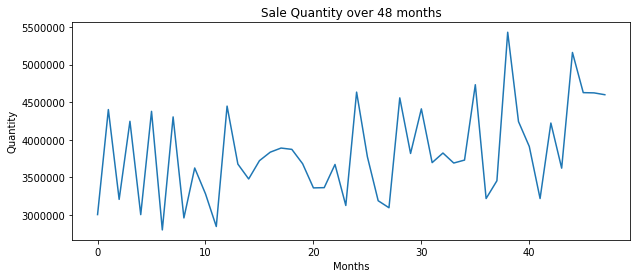

In [8]:
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(wsb_df['Sale Quantity'])
plt.title('Sale Quantity over 48 months')

### 1. Forecasting using Moving average

In [23]:
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling(window = 12).mean().shift(1)

In [27]:
pd.set_option('display.float_format', lambda x: '%.2f' %x )
wsb_df[['Sale Quantity','mavg_12']][36:]

,Sale Quantity,mavg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


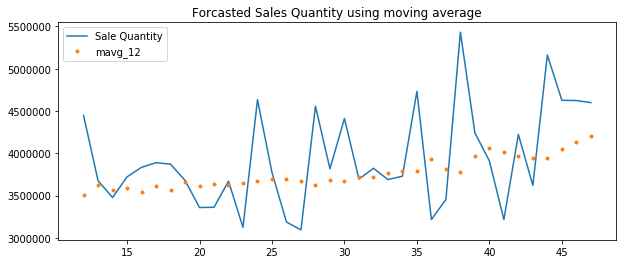

In [38]:
plt.figure(figsize=(10,4))
plt.xlabel = 'Months'
plt.ylabel = 'Quantity'
plt.plot(wsb_df['Sale Quantity'][12:])
plt.plot(wsb_df['mavg_12'][12:], '.')
plt.title("Forcasted Sales Quantity using moving average")
plt.legend()

## Mean Absolute Error

In [42]:
def get_mape(actual, predicted):
    return np.round(np.mean(np.abs((actual - predicted))/actual)*100, 2)

In [43]:
get_mape(wsb_df['Sale Quantity'][36:].values, wsb_df['mavg_12'][36:].values)

14.04

### Note: Forcasting moving average gives a MAPE of 14.04

In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(wsb_df['Sale Quantity'][36:].values, wsb_df['mavg_12'][36:].values))

734725.8359239782

### Note: RMSE of Moving Average forcating is 734725.835

## Exponential Smoothing

In [48]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm(alpha=0.2).mean()

In [49]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [50]:
# MAPE for exponential smoothing (ewm)
get_mape(wsb_df['Sale Quantity'][36:], wsb_df['ewm'][36:])

11.15

### Forcasting using Exponential smoothing has about 11.15% error(MAPE)

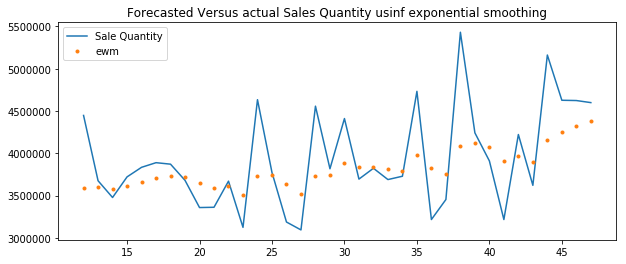

In [53]:
plt.figure(figsize=(10,4))
plt.xlabel='Months'
plt.ylabel ='Sale Quantity'
plt.plot(wsb_df['Sale Quantity'][12:])
plt.plot(wsb_df['ewm'][12:],'.')
plt.title('Forecasted Versus actual Sales Quantity usinf exponential smoothing')
plt.legend()

## Decomposing time series

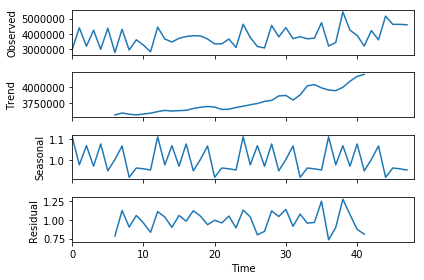

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompose = seasonal_decompose(np.array(wsb_df['Sale Quantity']), model='multiplicative', freq =12)
# Ploting the decomposed tie series components
ts_plot =ts_decompose.plot()

### Note: Sales quantity in WSB has trend which is incresing over time. It also has seasonality which varies from 0.9 to 1.1

In [58]:
wsb_df['Seasonal'] = ts_decompose.seasonal
wsb_df['Trend'] = ts_decompose.trend

In [64]:
wsb_df[12:30]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm,Seasonal,Trend
12,13,4447581,160,0,3503418.00,3587630.44,1.11,3615566.46
13,14,3675305,130,0,3623827.58,3605972.03,0.98,3634282.83
14,15,3477156,130,0,3563306.92,3579269.30,1.07,3624959.96
15,16,3720794,140,0,3585963.33,3608394.03,0.97,3630716.58
16,17,3834086,167,1,3542250.42,3654572.27,1.08,3636106.12
17,18,3888913,148,1,3611595.92,3702300.20,0.95,3664083.08
18,19,3871342,150,1,3570858.17,3736602.92,1.00,3683527.50
19,20,3679862,129,0,3660274.75,3725122.37,1.07,3695362.50
20,21,3358242,120,0,3608290.92,3651063.22,0.92,3687342.83
21,22,3361488,122,0,3641629.00,3592717.66,0.96,3649127.96
